imported libraries

In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, Subset, ConcatDataset
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

Split dataset and create data loader

In [2]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # Chuyển kích thước hình ảnh về 32x32
    transforms.ToTensor()          # Chuyển đổi hình ảnh thành Tensor
])
dataset = datasets.ImageFolder(root='C:\\Users\\Administrator\\Desktop\\AI\\eng_handwritten', transform=transform)

# Split dataset into 2, 1 for uppercase and 1 for lowercase
mid_point = len(dataset) // 2
first_half = Subset(dataset, np.arange(0, mid_point))
second_half = Subset(dataset, np.arange(mid_point, len(dataset)))

# Take 80% of each half as training data
first_half_train, first_half_test = random_split(first_half, [int(0.8 * len(first_half)), len(first_half) - int(0.8 * len(first_half))])
second_half_train, second_half_test = random_split(second_half, [int(0.8 * len(second_half)), len(second_half) - int(0.8 * len(second_half))])

# add them into 1 dataset

train_dataset = ConcatDataset([first_half_train, second_half_train])
test_dataset = ConcatDataset([first_half_test, second_half_test])

# Create DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



Test tập dữ liệu

Number of classes: 26
Number of images: 2860


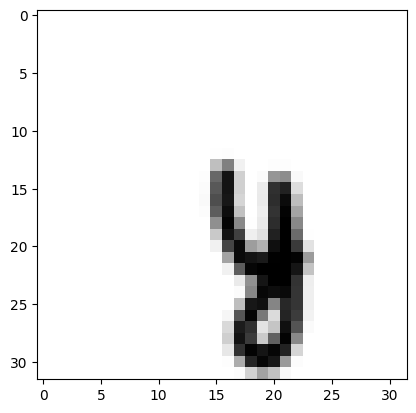

In [3]:
print("Number of classes:", len(dataset.classes))
print("Number of images:", len(dataset))

# Additionally, show a sample image to verify transformations

def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # convert from Tensor image
    plt.imshow(img)
    plt.show()

# Get a sample from the dataset
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[0]))

LINEAR MODEL

In [4]:
#LINEAR MODEL
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(32*32*3,26)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear(x)
        return x
linear_model = LinearModel()

#define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001)

#training model
def train_model_linear(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')
   
train_model_linear(linear_model, train_loader, criterion, optimizer)


Epoch 1/10, Loss: 3.8639866709709167


TEST FOR LINEAR MODEL

Loss: 2.6759, Accuracy: 27.27%
Confusion Matrix:
 [[ 2  0  2  0  2  0  1  0  0  0  0  0  5  0  0  0  1  3  1  0  0  0  0  2
   0  0]
 [ 0  9  1  0  0  0  3  0  2  0  0  1  1  0  0  0  0  3  3  1  1  3  0  0
   0  0]
 [ 0  0 12  0  0  0  0  0  4  0  0  2  0  0  0  0  0  1  0  0  2  0  0  0
   0  0]
 [ 0  0  1  7  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  3  0  4
   0  8]
 [ 0  0  3  0  8  0  0  0  0  0  0  1  1  0  0  0  0  2  0  3  1  0  0  3
   0  0]
 [ 0  0  3  0  2  1  2  0  0  4  0  0  1  0  0  3  0  0  0  1  0  1  0  0
   0  0]
 [ 0  1  0  2  0  0  6  1  0  0  0  0  0  0  0  1  2  2  2  0  0  0  0  1
   0  0]
 [ 0  0  0  0  1  0  0  3  1  0  0  0  5  0  0  0  0  4  1  0  0  3  0  4
   0  0]
 [ 0  0  1  0  0  0  0  0  9  3  0  3  0  0  0  0  0  0  1  5  0  4  0  2
   0  0]
 [ 0  0  0  0  0  0  1  0  2  9  0  0  0  0  0  1  0  0  0  1  0  0  0  0
   0  0]
 [ 0  1  2  0  3  0  0  0  0  0  0  1  2  0  0  0  0  2  0  0  1  0  0  8
   0  0]
 [ 0  0  4  0  0  0  0  0 10  2  0  6

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

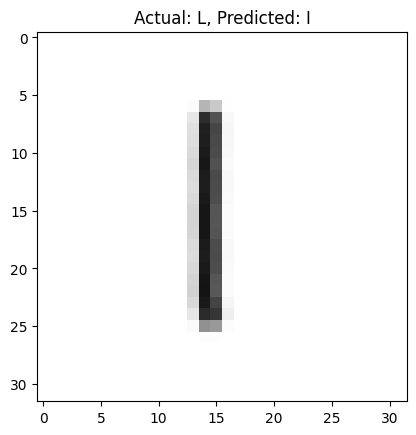

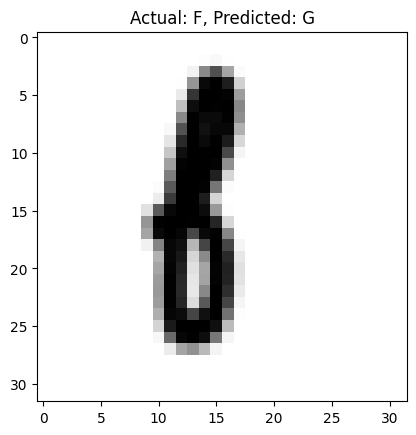

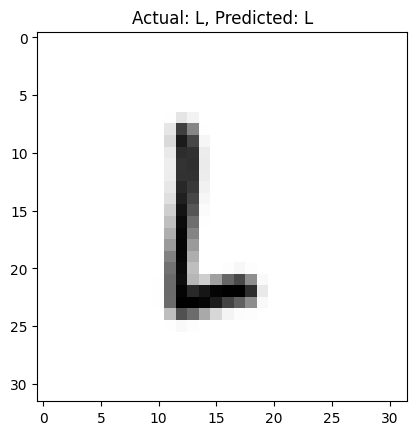

In [ ]:
# evaluate test data
def evaluate_model(model, data_loader):
    model.eval()
    total_loss = 0
    all_predicted = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            all_predicted.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = 100 * np.sum(np.array(all_predicted) == np.array(all_labels)) / len(all_labels)
    print(f'Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

    # Calculate Confusion Matrix
    
    cm = confusion_matrix(all_labels, all_predicted)
    print("Confusion Matrix:\n", cm)
    
    # Classification Report
    clr = classification_report(all_labels, all_predicted, target_names=[f'Class {i}' for i in range(len(np.unique(all_labels)))])
    print("Classification Report:\n", clr)
    
    return avg_loss, accuracy, cm, clr

linear_loss, linear_accuracy, linear_cm, linear_clr = evaluate_model(linear_model, test_loader)
# print results

def predict_image(image, model):
    # Chuyển mô hình sang chế độ đánh giá
    model.eval()
    
    # Tạo một batch từ hình ảnh đầu vào
    image = image.unsqueeze(0)  # Thêm một chiều batch ở đầu
    
    # Thực hiện dự đoán
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)
        return predicted.item()

def imshow(img, label, predicted_label):
   
    if torch.is_tensor(img):
        img = img.cpu().numpy()  
    
    # If img is a tensor with 3 channels (C, H, W), change it to (H, W, C)
    if img.shape[0] == 3:  # Check if it has 3 channels
        img = img.transpose((1, 2, 0))  # Change (C, H, W) to (H, W, C)
    
    plt.imshow(img)  
    plt.title(f'Actual: {label}, Predicted: {predicted_label}')
    plt.show()

dataiter = iter(test_loader)
for i in range(3):
    images, labels = next(dataiter)
    idx = torch.randint(len(images), (1,)).item()
    single_image = images[idx]
    true_label = chr(65 + labels[idx].item())  # Chuyển đổi label số thành chữ

    # Dự đoán nhãn của hình ảnh
    predicted_label = chr(65+predict_image(single_image, linear_model))

    # Hiển thị hình ảnh và nhãn
    imshow(single_image, true_label, predicted_label)

CNN MODEL

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)  # Adjust to accept 3 input channels
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        # After two pooling layers, the image size is reduced to 8x8 (32 -> 16 -> 8)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # Adjust dimensions for the flattened layer
        self.fc2 = nn.Linear(128, 26)  # 26 output classes for A-Z

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten the tens d layer
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
CNN_model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(CNN_model.parameters(), lr=0.001)
def train_model_CNN(model, criterion, optimizer, epochs=10):
    
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)  
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss}')
       
train_model_CNN(CNN_model, criterion, optimizer)



Epoch 1, Loss: 3.253659705320994
Epoch 2, Loss: 3.0623311201731362
Epoch 3, Loss: 2.524896356794569
Epoch 4, Loss: 2.0753108825948505
Epoch 5, Loss: 1.7541134821044073
Epoch 6, Loss: 1.505976117319531
Epoch 7, Loss: 1.3499595986472235
Epoch 8, Loss: 1.1969206879536312
Epoch 9, Loss: 1.101454077495469
Epoch 10, Loss: 1.002396187848515


TEST FOR CNN MODEL

Loss: 1.2426, Accuracy: 59.27%
Confusion Matrix:
 [[ 5  0  1  0  0  0  0  7  0  1  0  0  1  1  0  0  0  0  0  0  1  0  1  1
   0  0]
 [ 0 18  0  0  0  0  0  2  0  0  0  0  0  0  0  0  2  1  0  1  4  0  0  0
   0  0]
 [ 0  0 15  0  3  0  1  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0 14  0  0  0  0  0  0  1  2  0  0  2  0  0  0  0  0  3  1  0  1
   0  0]
 [ 0  1  3  0 13  0  0  0  1  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0
   0  1]
 [ 0  0  0  0  1  9  1  0  0  1  0  0  0  0  0  2  0  0  1  3  0  0  0  0
   0  0]
 [ 0  1  0  2  0  0  8  0  0  0  0  0  0  0  0  0  5  1  0  0  0  0  0  0
   0  1]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  1  0  2  1  0  0  0  1  1  2  0
   0  0]
 [ 0  0  0  0  0  1  0  0 15  1  0  7  0  0  0  0  1  0  0  1  0  2  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  1  0  0  0  0  0  1  0  0
   0  1]
 [ 0  0  1  0  0  0  0  0  0  0 13  0  1  0  1  1  0  0  0  1  1  1  0  0
   0  0]
 [ 0  0  0  1  0  0  0  0  5  0  0 16

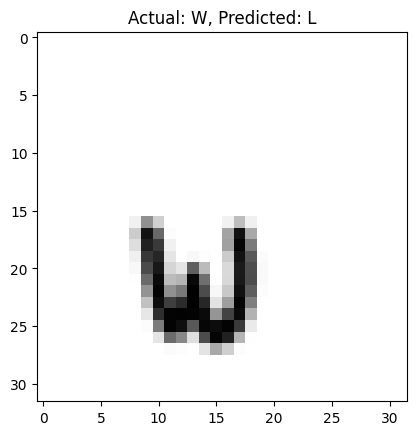

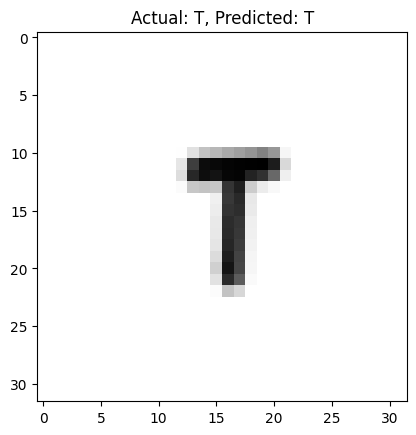

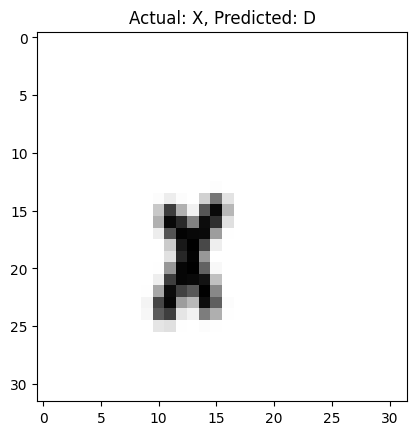

In [ ]:
#evaluate test dataset
  
CNN_loss, CNN_accuracy, CNN_cm, CNN_clr = evaluate_model(CNN_model, test_loader)

for i in range(3):
    images, labels = next(dataiter)
    idx = torch.randint(len(images), (1,)).item()
    single_image = images[idx]
    true_label = chr(65 + labels[idx].item())  # Chuyển đổi label số thành chữ

    # Dự đoán nhãn của hình ảnh
    predicted_label = chr(65+predict_image(single_image, CNN_model))

    # Hiển thị hình ảnh và nhãn
    imshow(single_image, true_label, predicted_label)

Comparison of  2 model( both using learning rate = 0.001 and 10 epochs): 
    
    - Learning time is almost the same, 4'43' for CNN and 4'38' for Linear    
    - Linear model has low accuracy (27%) because it is not suitable for a non-linear classification like classifying image
    - CNN model have better accuracy but it is also not too high (60%) and has a litte overfitting(need to change epoch lower than 10, maybe 9), its seem CNN is a good method to increase accuracy but need bigger training dataset
    - Some changes i haved tried:
        + increasing learning rate to 0.005: linear model has no big different, CNN model increase in accuracy but become too overfitting
        + using more than 10 epoch: same as increasing learning rate, the change of loss function is small after 18 epochs